# Analysis of Titanic Data set
A collection of featuers is used to develop a model to predict whether a person survived or not.

Analysis Outline
* Exploring the imported data
* Replacing missing values
* Changing categirical variables to binary(0 & 1)
* Testing models against data using Random Forest and Niave Bayes classifier
* Choosing the final model


In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('C:\\Users\\Edosomwan Oghogho\\Desktop\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Creating a visualization using seaborn to see columns with missing values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


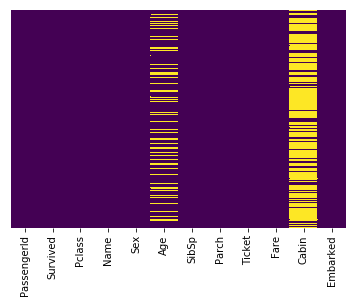

In [7]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

# Exploratory Data Analysis

In [8]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(6,3))

<Figure size 432x216 with 0 Axes>

male      577
female    314
Name: Sex, dtype: int64


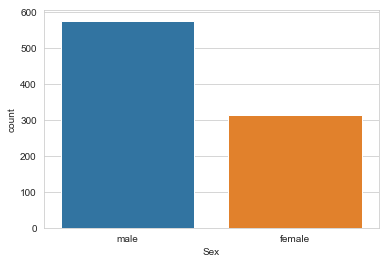

In [9]:
print(train['Sex'].value_counts())
sns.countplot(x='Sex',data=train)


This count plot tells us that major gender was male (577) and number of females was 314.

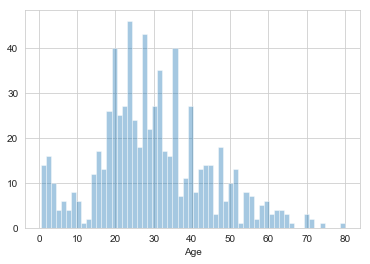

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=60)

From the above distribution plot, we see that the majority of the passengers were in the range of 20-35 with highest peak around 23-24. Also the curve is positively skewed

3    491
1    216
2    184
Name: Pclass, dtype: int64


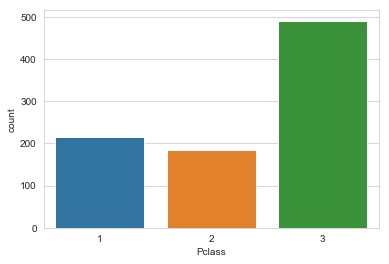

In [11]:
print(train['Pclass'].value_counts())
sns.countplot(x='Pclass',data=train)

We can see that the majority of the people belonged to the Third class(491 people), followed by the First class(216 people) and then the middle class or  Second class(184 people).

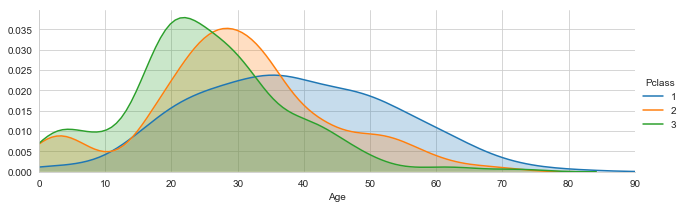

In [12]:
ageclass_dist = sns.FacetGrid(train, hue = 'Pclass', aspect = 3)
ageclass_dist.map(sns.kdeplot,'Age', shade=True)
ageclass_dist.set(xlim=(0,90))
ageclass_dist.add_legend()
plt.show()

From the above Kernel Density Estimator (KDE) plot, Pclass 1 (First class) has the most evenly distributed shape for the whole range of age. This might be due to the fact that Pclass 1 had less passengers compared to the other two classes. For the Pclass 2 (Second class),majority of the distribution lies between 20 - 40 years and for Pclass 3 (Third class),majority of the distribution lies between 15 - 35 years.

0    549
1    342
Name: Survived, dtype: int64


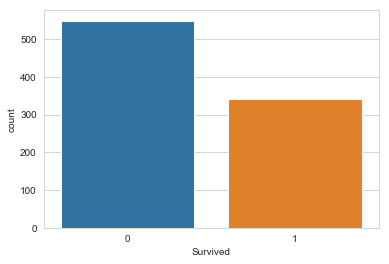

In [13]:
# SURVIVAL RATE
print(train['Survived'].value_counts())
sns.countplot(x='Survived',data=train)

From the plot, it can be seen that out of 891 people,342 people survived and 549 people did not survive.

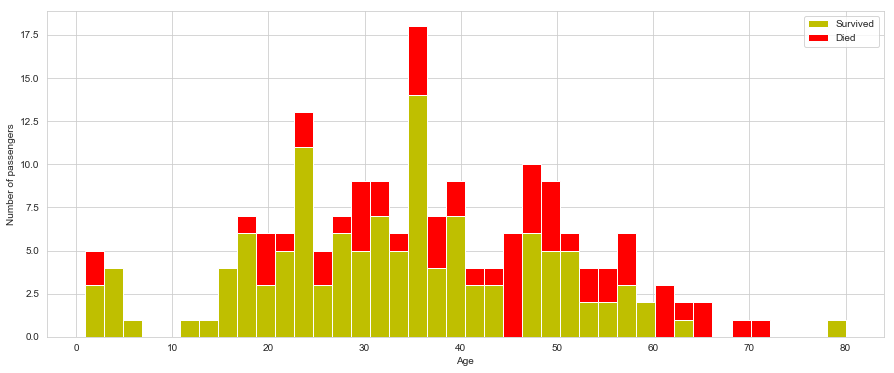

In [14]:
plt.figure(figsize=(15,6))
plt.hist([train.dropna()[train.dropna()['Survived']==1]['Age'], train.dropna()[train.dropna()['Survived']==0]['Age']], stacked=True,
         color = ['y','r'],bins = 40,label = ['Survived','Died'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

The plot shows the survival rate based on age. passengers between the 0 - 18 are more likely to survive than older ones who are more than 18 and less than 50. Majority of passengers with ages above 50 but less than 75 died and all above 75 survived. Seems old people were rescued first, follwed by younger people betweeen 0 - 18.

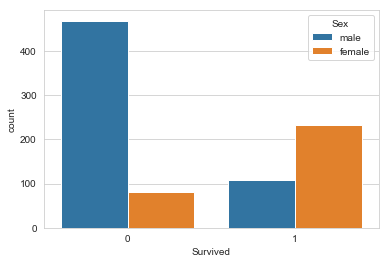

In [15]:
#SURVIVAL BY SEX
sns.countplot(x='Survived',hue='Sex',data=train)
#More female passengers survived compared to male passengers

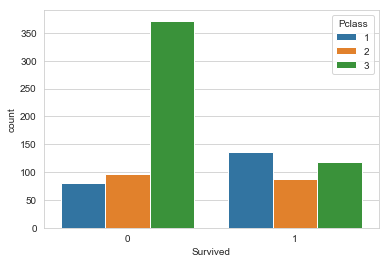

In [16]:
#SURVIVAL RATE BY CLASS
sns.countplot(x='Survived',hue='Pclass',data=train)
# From the plot below, it can be seen that more people died in the third class followed by the second class and then the first class
# The first class had the highest survival rate compared to the second and third class.

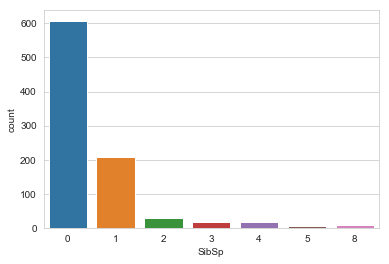

In [17]:
sns.countplot(x='SibSp',data=train)

# Dealing with the missing values

In [18]:
#Replacing missing values with mean
age=train['Age'].mean()
train['Age'].replace(np.nan, age, inplace=True)

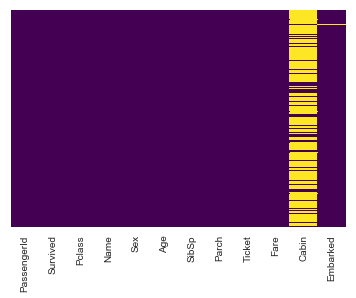

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
#Dropping the cabin column because it will not be used
train.drop('Cabin',axis=1, inplace=True)

In [21]:
#Dropping all other missing vlaues in the data which is just two rows in the Embarked column
train.dropna(inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Creating a dunny variable, that is changing categorical variables to binary, 0 and 1

In [24]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [25]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
embark.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
train=pd.concat([train,sex,embark],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [31]:
train.drop('PassengerId', axis=1, inplace=True)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
x=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y=train['Survived']

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel= LogisticRegression()

In [38]:
logmodel.fit(X_train, y_train)

C:\Users\Edosomwan Oghogho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predictions=logmodel.predict(X_test)

In [40]:
logmodel.coef_

array([[-0.75263392, -0.02508168, -0.21164001, -0.09130862,  0.00469285,
        -2.33062195,  0.03234583, -0.18570696]])

In [41]:
logmodel.intercept_

array([3.43425322])

In [42]:
from sklearn.metrics import confusion_matrix

In [44]:
cnf_matrix=confusion_matrix(y_test, predictions)
cnf_matrix

array([[147,  16],
       [ 36,  68]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

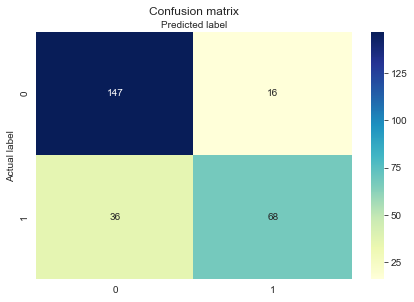

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
from sklearn import metrics

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("f1_score: ",metrics.f1_score(y_test, predictions))

Accuracy: 0.8052434456928839
Precision: 0.8095238095238095
Recall: 0.6538461538461539
f1_score:  0.7234042553191489


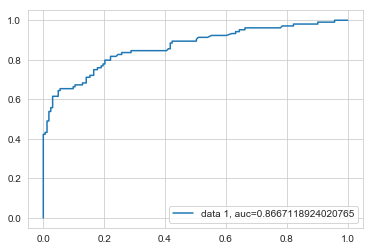

In [48]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



# Naive Bayes Classifier

In [49]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [50]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [51]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score: ",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8052434456928839
Precision: 0.7888888888888889
Recall: 0.6826923076923077
f1_score:  0.7319587628865979


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [68]:
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[144,  19],
       [ 33,  71]], dtype=int64)

Both the Logistic Regression Model and Naive Bayes Classifier appears to be good as both has same accuracy score, Slight difference between precision, recall and F1 score which appreas to be okay. 
The False positive (Observation is negative, but is predicted positive) and False Negative (Observation is positive, but is predicted negative.) in both confusion Matrix are similar. Any of the models can be used.